In [1]:
from slmcontrol import *
from cameras.Ximea import XimeaCamera
from capture_utils import *
import numpy as np
import matplotlib.pyplot as plt
import h5py

x, y = build_grid(15.36, 8.64, 1920, 1080)
w = 0.3
incoming = hg(x, y, 0, 0, 2.3)
config = Config(incoming, x, y, 82,4,-3)

In [2]:
slm = SLMdisplay(monitor=1)

In [3]:
camera = XimeaCamera()
camera.camera.set_param("downsampling", "XI_DWN_2x2")
camera.camera.set_param("exposure", 15)
camera.camera.set_param("width", 200)
camera.camera.set_param("height", 200)
camera.camera.set_param("offsetX", 84)
camera.camera.set_param("offsetY", 236)

In [7]:
desired = lg(x, y, 0, 0, w)
holo = generate_hologram(desired, incoming, x, y, 82, 4, -3, 0, 0)
slm.updateArray(holo)

142


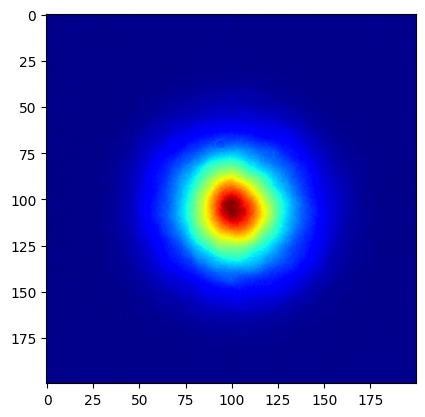

In [8]:
calibration = camera.capture()
print(calibration.max())
plt.imshow(calibration, cmap='jet')

In [10]:
r = np.linspace(-0.5,0.5,200)
x_fit,y_fit = np.meshgrid(r,r)
p0 = [0,0,0.1,calibration.max(), calibration.min()]


fit, cov = surface_fit(gaussian_model,x_fit,y_fit,calibration,p0)
x0,y0,w_fit,a,b = fit
fit

array([8.26486512e-03, 3.10512422e-02, 2.12190743e-01, 1.21141826e+02,
       2.28334610e+00])

105


0.5079685368196767

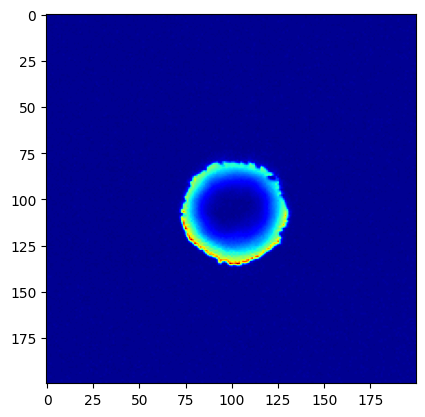

In [26]:
desired = lg(x, y, 0, 2, w)
holo = generate_hologram(desired, incoming, x, y, 82, 4, -3, 0, 0)
slm.updateArray(holo)

iris_calibration = camera.capture()
print(iris_calibration.max())
plt.imshow(iris_calibration, cmap='jet', vmax=iris_calibration.max())

r_deriv = finite_diff_r_derivative(iris_calibration, x_fit - p0[0], y_fit - p0[1], 0, 0)
#plt.imshow(r_deriv)
max_index = np.argmax(r_deriv)
    
# Convert the flattened index back to 2D indices
i,j = np.unravel_index(max_index, r_deriv.shape)
np.sqrt((r[i]-x0)**2 + (r[j]-y0)**2) / w

In [13]:
basis = np.stack([lg(x,y,1,0,w), lg(x,y,0,2,w)])

with h5py.File("../Data/template.h5") as file:
    rhos = file["labels_dim2"][:50]

mean_imgs = np.empty((rhos.shape[0], 200, 200), dtype=np.uint8)

In [14]:
basis_loop(mean_imgs, 300, basis, rhos,
    camera, slm, config, sleep_time=0.0)

Capturing mode  1


100%|██████████| 299/299 [00:42<00:00,  7.03it/s]


Capturing mode  2


100%|██████████| 299/299 [00:37<00:00,  7.89it/s]


Capturing mode  3


100%|██████████| 299/299 [00:38<00:00,  7.84it/s]


Capturing mode  4


100%|██████████| 299/299 [00:37<00:00,  7.93it/s]


Capturing mode  5


100%|██████████| 299/299 [00:37<00:00,  7.92it/s]


Capturing mode  6


100%|██████████| 299/299 [00:40<00:00,  7.41it/s]


Capturing mode  7


100%|██████████| 299/299 [00:40<00:00,  7.35it/s]


Capturing mode  8


100%|██████████| 299/299 [00:39<00:00,  7.56it/s]


Capturing mode  9


100%|██████████| 299/299 [00:45<00:00,  6.57it/s]


Capturing mode  10


100%|██████████| 299/299 [00:39<00:00,  7.59it/s]


Capturing mode  11


100%|██████████| 299/299 [00:38<00:00,  7.72it/s]


Capturing mode  12


100%|██████████| 299/299 [00:38<00:00,  7.68it/s]


Capturing mode  13


100%|██████████| 299/299 [00:39<00:00,  7.66it/s]


Capturing mode  14


100%|██████████| 299/299 [00:38<00:00,  7.87it/s]


Capturing mode  15


100%|██████████| 299/299 [00:38<00:00,  7.85it/s]


Capturing mode  16


100%|██████████| 299/299 [00:37<00:00,  7.92it/s]


Capturing mode  17


100%|██████████| 299/299 [00:39<00:00,  7.61it/s]


Capturing mode  18


100%|██████████| 299/299 [00:37<00:00,  7.93it/s]


Capturing mode  19


100%|██████████| 299/299 [00:40<00:00,  7.33it/s]


Capturing mode  20


100%|██████████| 299/299 [00:37<00:00,  7.90it/s]


Capturing mode  21


100%|██████████| 299/299 [00:39<00:00,  7.65it/s]


Capturing mode  22


100%|██████████| 299/299 [00:37<00:00,  7.94it/s]


Capturing mode  23


100%|██████████| 299/299 [00:37<00:00,  7.90it/s]


Capturing mode  24


100%|██████████| 299/299 [00:37<00:00,  7.92it/s]


Capturing mode  25


100%|██████████| 299/299 [00:38<00:00,  7.83it/s]


Capturing mode  26


100%|██████████| 299/299 [00:38<00:00,  7.82it/s]


Capturing mode  27


100%|██████████| 299/299 [00:37<00:00,  7.90it/s]


Capturing mode  28


100%|██████████| 299/299 [00:37<00:00,  7.87it/s]


Capturing mode  29


100%|██████████| 299/299 [00:37<00:00,  7.93it/s]


Capturing mode  30


100%|██████████| 299/299 [00:37<00:00,  7.96it/s]


Capturing mode  31


100%|██████████| 299/299 [00:37<00:00,  8.03it/s]


Capturing mode  32


100%|██████████| 299/299 [00:37<00:00,  7.99it/s]


Capturing mode  33


100%|██████████| 299/299 [00:37<00:00,  8.02it/s]


Capturing mode  34


100%|██████████| 299/299 [00:37<00:00,  8.02it/s]


Capturing mode  35


100%|██████████| 299/299 [00:37<00:00,  7.95it/s]


Capturing mode  36


100%|██████████| 299/299 [00:37<00:00,  8.03it/s]


Capturing mode  37


100%|██████████| 299/299 [00:37<00:00,  8.05it/s]


Capturing mode  38


100%|██████████| 299/299 [00:36<00:00,  8.08it/s]


Capturing mode  39


100%|██████████| 299/299 [00:37<00:00,  7.93it/s]


Capturing mode  40


100%|██████████| 299/299 [00:36<00:00,  8.09it/s]


Capturing mode  41


100%|██████████| 299/299 [00:37<00:00,  8.04it/s]


Capturing mode  42


100%|██████████| 299/299 [00:36<00:00,  8.17it/s]


Capturing mode  43


100%|██████████| 299/299 [00:36<00:00,  8.11it/s]


Capturing mode  44


100%|██████████| 299/299 [00:37<00:00,  7.98it/s]


Capturing mode  45


100%|██████████| 299/299 [00:36<00:00,  8.23it/s]


Capturing mode  46


100%|██████████| 299/299 [00:36<00:00,  8.20it/s]


Capturing mode  47


100%|██████████| 299/299 [00:36<00:00,  8.27it/s]


Capturing mode  48


100%|██████████| 299/299 [00:35<00:00,  8.31it/s]


Capturing mode  49


100%|██████████| 299/299 [00:36<00:00,  8.30it/s]


Capturing mode  50


100%|██████████| 299/299 [00:36<00:00,  8.27it/s]


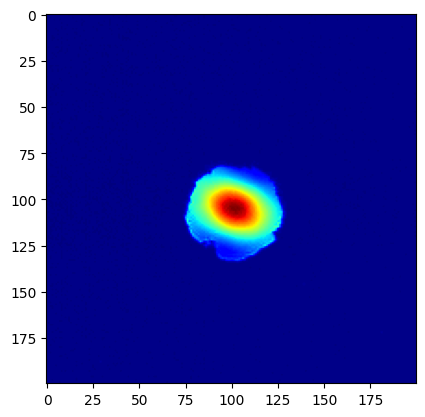

In [15]:
img_plot = mean_imgs[0]

plt.imshow(img_plot, cmap='jet')

In [16]:
with h5py.File("../Data/Raw/test_python_4.h5", 'a') as file:
    file["images_1"] = mean_imgs
    file["images_1"].attrs["density_matrices"] = rhos

In [27]:
with h5py.File("../Data/Raw/test_python_4.h5", 'a') as file:
    desired = lg(x, y, 0, 2, w)
    holo = generate_hologram(desired, incoming, x, y, 82, 4, -3, 0, 0)
    slm.updateArray(holo,1)
    file["calibration"] = camera.capture()